<a href="https://colab.research.google.com/github/maorisraelii/twitter-sentiment-analysis/blob/main/twitter_sentiment_analysis_and_Stock_prediction_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# Import the yfinance, pandas, and Google Colab libraries.
import yfinance as yf
import pandas as pd
from google.colab import drive

# Import the re, emoji, and pandas libraries.
import re
!pip install emoji
import emoji
import pandas as pd

# Import the WordCloud, STOPWORDS, and matplotlib.pyplot libraries.
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Import the TextBlob and matplotlib.pyplot libraries.
from textblob import TextBlob
import matplotlib.pyplot as plt

# Import the StandardScaler, MinMaxScaler, and numpy libraries.
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

# Import the tensorflow and keras libraries.
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Conv1D, Conv2D, MaxPooling2D, MaxPooling1D, Flatten
from tensorflow.compat.v1.keras.layers import CuDNNLSTM, Bidirectional
from keras.layers import Dense, Dropout

# Import the mean_squared_error, mean_absolute_error, and math libraries.
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from math import sqrt

# Import the seaborn library.
import seaborn as sns


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Define the ticker symbols for all companies in the S&P 500 index.
# The `pd.read_html()` function reads the HTML table from the Wikipedia page and returns a list of DataFrames.
# The `[0]` index selects the first DataFrame, which contains the ticker symbols.
# The `.tolist()` method converts the DataFrame to a list.
sp500_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol'].tolist()

# Define the start and end dates for the data.
start_date = '2019-10-01'
end_date = '2020-12-31'

# Create an empty dictionary to store the dataframes for each company's historical data.
company_data_2019_2020 = {}

# Iterate over each ticker symbol and download the historical data using yfinance.
# The `try`-`except` block catches any errors that may occur when downloading the data.
for ticker_symbol in sp500_tickers:
    try:
        # The `yf.download()` function downloads historical data for a stock.
        # The `ticker_symbol` argument specifies the stock ticker symbol.
        # The `start` and `end` arguments specify the start and end dates for the data.
        company_data_2019_2020[ticker_symbol] = yf.download(ticker_symbol, start=start_date, end=end_date)
    except Exception as e:
        # Print an error message if an error occurs.
        print(f"Error downloading data for {ticker_symbol}: {e}")

# The `company_data_2019_2020` dictionary now contains the historical data for all companies in the S&P 500 index from October 1, 2019 to December 31, 2020.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [3]:
# Repeat for 2022
start_date = '2022-01-01'
end_date = '2022-12-31'

company_data_2022 = {}
for ticker_symbol in sp500_tickers:
    try:
        # The `yf.download()` function downloads historical data for a stock.
        # The `ticker_symbol` argument specifies the stock ticker symbol.
        # The `start` and `end` arguments specify the start and end dates for the data.
        company_data_2022[ticker_symbol] = yf.download(ticker_symbol, start=start_date, end=end_date)
    except Exception as e:
        # Print an error message if an error occurs.
        print(f"Error downloading data for {ticker_symbol}: {e}")

# The `company_data_2022` dictionarie now contain the historical data for all companies in the S&P 500 index from January 1, 2022 to December 31, 2022.

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [4]:
# Define the URLs for the CSV files.
url_musk = 'https://raw.githubusercontent.com/maorisraelii/twitter-sentiment-analysis/main/Musk(2014-2019).csv'
url_biden = 'https://raw.githubusercontent.com/maorisraelii/twitter-sentiment-analysis/main/Biden(2007-2020).csv'
url_trump = 'https://raw.githubusercontent.com/maorisraelii/twitter-sentiment-analysis/main/Trump(2017-2021).csv'

# Read the CSV files into DataFrames.
musk = pd.read_csv(url_musk, encoding= 'unicode_escape')
biden = pd.read_csv(url_biden, encoding= 'unicode_escape')
trump = pd.read_csv(url_trump, encoding= 'unicode_escape',on_bad_lines= 'skip')

# The `musk`, `biden`, and `trump` DataFrames now contain the data from the CSV files.

In [5]:
# Define regular expressions to match links and emojis
link_pattern = r'https?://\S+'
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

# Clean 'musk' dataset
musk['tweet'] = musk['tweet'].fillna('')  # Replace NaN values with an empty string
musk = musk[~musk['tweet'].str.match(link_pattern)]  # Remove rows with tweets that contain only links
musk = musk[~musk['tweet'].str.contains(emoji_pattern)]  # Remove rows with tweets that contain emojis
musk = musk.dropna(axis=0, how='all')  # Drop rows with all NaN values
musk = musk.dropna(axis=1, how='all')  # Drop columns with all NaN values
musk = musk.reset_index(drop=True)  # Reset the index of the dataset
musk.dropna(subset=['date'], inplace=True)  # Drop rows with NaN values in the 'date' column

# Clean 'biden' dataset
biden['tweet'] = biden['tweet'].fillna('')  # Replace NaN values with an empty string
biden = biden[~biden['tweet'].str.match(link_pattern)]  # Remove rows with tweets that contain only links
biden = biden[~biden['tweet'].str.contains(emoji_pattern)]  # Remove rows with tweets that contain emojis
biden = biden.dropna(axis=0, how='all')  # Drop rows with all NaN values
biden = biden.dropna(axis=1, how='all')  # Drop columns with all NaN values
biden = biden.reset_index(drop=True)  # Reset the index of the dataset
biden.dropna(subset=['time'], inplace=True)  # Drop rows with NaN values in the 'time' column

# Clean 'trump' dataset
trump['tweet'] = trump['tweet'].fillna('')  # Replace NaN values with an empty string
trump = trump[~trump['tweet'].str.match(link_pattern)]  # Remove rows with tweets that contain only links
trump = trump[~trump['tweet'].str.contains(emoji_pattern)]  # Remove rows with tweets that contain emojis
trump = trump.dropna(axis=0, how='all')  # Drop rows with all NaN values
trump = trump.dropna(axis=1, how='all')  # Drop columns with all NaN values
trump = trump.reset_index(drop=True)  # Reset the index of the dataset
trump.dropna(subset=['time'], inplace=True)  # Drop rows with NaN values in the 'time' column


In [6]:
trump

,id,time,url,tweet,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,@realDonaldTrump,2017-01-20 06:31,https://twitter.com/realDonaldTrump/status/82...,"""It all begins today! I will see you at 11:00...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,@realDonaldTrump,2017-01-20 11:51,https://twitter.com/realDonaldTrump/status/82...,"""Today we are not merely transferring power f...",or from one party to another âÃÃ¬ but we a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,@realDonaldTrump,2017-01-20 11:51,https://twitter.com/realDonaldTrump/status/82...,"""power from Washington",D.C. and giving it back to you,"the American People. # InaugurationDay""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,@realDonaldTrump,2017-01-20 11:52,https://twitter.com/realDonaldTrump/status/82...,"""What truly matters is not which party contro...",but whether our government is controlled by t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,@realDonaldTrump,2017-01-20 11:53,https://twitter.com/realDonaldTrump/status/82...,"""January 20th 2017",will be remembered as the day the people beca...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23068,@realDonaldTrump,2021-01-07 04:13,https://twitter.com/realDonaldTrump/status/13...,"""I am asking for everyone at the U.S. Capitol...",WE are the Party of Law &amp; Order â respe...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23069,@realDonaldTrump,2021-01-07 05:17,https://twitter.com/realDonaldTrump/status/13...,"""https://t.co/Pm2PKV0Fp3""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23070,@realDonaldTrump,2021-01-08 08:10,https://twitter.com/realDonaldTrump/status/13...,"""https://t.co/csX07ZVWGe""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23071,@realDonaldTrump,2021-01-08 22:46,https://twitter.com/realDonaldTrump/status/13...,"""The 75",0,000 great American Patriots who voted for me,AMERICA FIRST,and MAKE AMERICA GREAT AGAIN,will have a GIANT VOICE long into the future....,"shape or form!!!""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
musk

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,reply_to
0,1381273474400800773,1381002894032347138,2021-04-11 18:50:33 EEST,2021-04-11,18:50:33,300,44196397,elonmusk,Elon Musk,@vincent13031925 For now. Costs are decreasing...,...,444,15281,[],[],https://twitter.com/elonmusk/status/1381273474...,False,NaN,0,NaN,"[{'screen_name': 'vincent13031925', 'name': 'V..."
1,1381273076709478403,1372444955050971142,2021-04-11 18:48:58 EEST,2021-04-11,18:48:58,300,44196397,elonmusk,Elon Musk,Love this beautiful shot,...,1517,71161,[],[],https://twitter.com/elonmusk/status/1381273076...,False,NaN,0,NaN,[]
2,1381258144916008964,1381230136918433792,2021-04-11 17:49:38 EEST,2021-04-11,17:49:38,300,44196397,elonmusk,Elon Musk,@agnostoxxx @CathieDWood @ARKInvest Trust the ...,...,48,1380,[],[],https://twitter.com/elonmusk/status/1381258144...,False,NaN,0,NaN,"[{'screen_name': 'agnostoxxx', 'name': 'Shrubb..."
3,1381221447322935303,1381221447322935303,2021-04-11 15:23:49 EEST,2021-04-11,15:23:49,300,44196397,elonmusk,Elon Musk,The art In Cyberpunk is incredible,...,10329,228144,[],[],https://twitter.com/elonmusk/status/1381221447...,False,NaN,0,NaN,[]
4,1381129584435818496,1381079981485252611,2021-04-11 09:18:47 EEST,2021-04-11,09:18:47,300,44196397,elonmusk,Elon Musk,@itsALLrisky ð¤£ð¤£,...,542,7489,[],[],https://twitter.com/elonmusk/status/1381129584...,False,NaN,0,NaN,"[{'screen_name': 'itsALLrisky', 'name': 'ð¸ð..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12557,1382255613665701894,1382189497694121990,2021-04-14 11:53:14 EEST,2021-04-14,11:53:14,300,44196397,elonmusk,Elon Musk,"@eugenelee3 @PPathole @SpaceX @Tesla Yeah, not...",...,102,2362,[],[],https://twitter.com/elonmusk/status/1382255613...,False,NaN,0,NaN,"[{'screen_name': 'eugenelee3', 'name': 'eugene..."
12558,1382239892445401089,1382189497694121990,2021-04-14 10:50:45 EEST,2021-04-14,10:50:45,300,44196397,elonmusk,Elon Musk,@PPathole @SpaceX @Tesla That was my night job...,...,270,5209,[],[],https://twitter.com/elonmusk/status/1382239892...,False,NaN,0,NaN,"[{'screen_name': 'PPathole', 'name': 'Pranay P..."
12559,1382239304097824768,1382189497694121990,2021-04-14 10:48:25 EEST,2021-04-14,10:48:25,300,44196397,elonmusk,Elon Musk,@PPathole @SpaceX @Tesla True. Ancient times â...,...,1158,46198,[],[],https://twitter.com/elonmusk/status/1382239304...,False,NaN,0,NaN,"[{'screen_name': 'PPathole', 'name': 'Pranay P..."
12560,1382131928619495429,1382046129450258434,2021-04-14 03:41:45 EEST,2021-04-14,03:41:45,300,44196397,elonmusk,Elon Musk,@Erdayastronaut @Tesla Absolutely,...,204,6051,[],[],https://twitter.com/elonmusk/status/1382131928...,False,NaN,0,NaN,"[{'screen_name': 'Erdayastronaut', 'name': 'Ev..."


In [8]:
biden

,id,time,url,tweet,replies,retweets,quotes,likes
0,3.613886e+08,24/10/2007 22:45,https://twitter.com/JoeBiden/status/361388562,Tune in 11:30 ET tomorrow for a live webcast o...,19,5,17,11
1,5.439844e+08,29/12/2007 15:35,https://twitter.com/JoeBiden/status/543984392,"Iowans, there's a good chance there's a Biden ...",13,16,6,22
2,1.892870e+17,09/04/2012 09:42,https://twitter.com/JoeBiden/status/1892872273...,We're excited to announce that @JoeBiden is be...,21,82,1,20
3,1.892870e+17,09/04/2012 09:43,https://twitter.com/JoeBiden/status/1892873500...,Campaign staff will run this account to keep y...,144,76,37,51
4,1.893400e+17,09/04/2012 13:11,https://twitter.com/JoeBiden/status/1893396506...,News for you this morning: VP Biden will speak...,10,54,0,5
...,...,...,...,...,...,...,...,...
6050,1.322870e+18,01/11/2020 11:40,https://twitter.com/JoeBiden/status/1322865972...,"As president, Iâll build an economy that rew...",3085,3654,480,36995
6051,1.322870e+18,01/11/2020 12:01,https://twitter.com/JoeBiden/status/1322871257...,Letâs put dogs back in the White House. http...,2211,4211,1246,34240
6052,1.322880e+18,01/11/2020 12:20,https://twitter.com/JoeBiden/status/1322876039...,We have in our hands the ultimate power: the p...,918,1143,122,6954
6053,1.322880e+18,01/11/2020 12:40,https://twitter.com/JoeBiden/status/1322881072...,"We need to:\n\nBuild bridges, not walls.\nOpen...",1281,2255,344,16696


In [9]:
# Convert 'time' column in the dataset to datetime format
trump['time'] = pd.to_datetime(trump['time'])
biden['time'] = pd.to_datetime(biden['time'])
musk['date'] = pd.to_datetime(musk['date'])

# Define start and end dates for the desired time range
start_date = pd.to_datetime('2019-10-01')
end_date = pd.to_datetime('2020-12-31')

# Filter the dataset for the specified time range
trump2019_2020 = trump[(trump['time'] >= start_date) & (trump['time'] <= end_date)]
biden2019_2020 = biden[(biden['time'] >= start_date) & (biden['time'] <= end_date)]
musk2019_2020 = musk[(musk['date'] >= start_date) & (musk['date'] <= end_date)]

In [10]:
trump2019_2020

,id,time,url,tweet,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
10693,@realDonaldTrump,2019-10-01 00:49:00,https://twitter.com/realDonaldTrump/status/11...,"""It was my Great Honor to attend this morning...","General Mark Milley! https://t.co/CXoDPnimgz""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10694,@realDonaldTrump,2019-10-01 02:55:00,https://twitter.com/realDonaldTrump/status/11...,"""Navistar will be building a new 250 MILLION ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10695,@realDonaldTrump,2019-10-01 03:04:00,https://twitter.com/realDonaldTrump/status/11...,"""Great news! @Apple announced that it is buil...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10696,@realDonaldTrump,2019-10-01 03:08:00,https://twitter.com/realDonaldTrump/status/11...,"""BIG NEWS by @Hyundai",@Kia,and @Aptiv on a 4 BILLION DOLLAR joint ventur...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10697,@realDonaldTrump,2019-10-01 03:45:00,https://twitter.com/realDonaldTrump/status/11...,"""My great friend",@RepMarkMeadows,has been an EXCELLENT Chairman of the House @...,which has been a tremendous success. I am loo...,"@RepAndyBiggsAZ!""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22921,@realDonaldTrump,2020-12-30 20:43:00,https://twitter.com/realDonaldTrump/status/13...,"""The Federal Government has distributed the v...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22922,@realDonaldTrump,2020-12-30 21:20:00,https://twitter.com/realDonaldTrump/status/13...,"""$2000 ASAP!""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22923,@realDonaldTrump,2020-12-30 22:26:00,https://twitter.com/realDonaldTrump/status/13...,"""Hearings from Atlanta on the Georgia Electio...","BIG! Also won the other Swing States.""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22924,@realDonaldTrump,2020-12-30 23:37:00,https://twitter.com/realDonaldTrump/status/13...,"""RT @TeamTrump: Time for state legislators to...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
biden2019_2020

,id,time,url,tweet,replies,retweets,quotes,likes
1290,1.083930e+18,2019-12-01 03:17:00,https://twitter.com/JoeBiden/status/1083925881...,White supremacists and their shameful ideology...,1060,7923,253,43003
1319,1.105270e+18,2019-12-03 00:51:00,https://twitter.com/JoeBiden/status/1105270121...,Joe Boardman led @Amtrak through difficult tim...,153,231,15,2683
1332,1.116810e+18,2019-12-04 21:13:00,https://twitter.com/JoeBiden/status/1116811587...,"In the last 5 years, @StopandShop's parent com...",376,1554,89,7159
1400,1.126920e+18,2019-10-05 18:21:00,https://twitter.com/JoeBiden/status/1126915076...,Iâm proud to have been one of the first to i...,808,1815,156,12963
1401,1.126920e+18,2019-10-05 18:21:00,https://twitter.com/JoeBiden/status/1126915077...,We need policies that reflect this urgency. I'...,319,382,47,4165
...,...,...,...,...,...,...,...,...
6050,1.322870e+18,2020-01-11 11:40:00,https://twitter.com/JoeBiden/status/1322865972...,"As president, Iâll build an economy that rew...",3085,3654,480,36995
6051,1.322870e+18,2020-01-11 12:01:00,https://twitter.com/JoeBiden/status/1322871257...,Letâs put dogs back in the White House. http...,2211,4211,1246,34240
6052,1.322880e+18,2020-01-11 12:20:00,https://twitter.com/JoeBiden/status/1322876039...,We have in our hands the ultimate power: the p...,918,1143,122,6954
6053,1.322880e+18,2020-01-11 12:40:00,https://twitter.com/JoeBiden/status/1322881072...,"We need to:\n\nBuild bridges, not walls.\nOpen...",1281,2255,344,16696


In [12]:
musk2019_2020

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,reply_to
761,1344520570235457536,1344518758707113986,2020-12-31 07:47:38 EET,2020-12-31,07:47:38,300,44196397,elonmusk,Elon Musk,Ignore the heading,...,704,37843,[],[],https://twitter.com/elonmusk/status/1344520570...,False,NaN,0,NaN,[]
762,1344518758707113986,1344518758707113986,2020-12-31 07:40:26 EET,2020-12-31,07:40:26,300,44196397,elonmusk,Elon Musk,Great interview with Mathias DÃ¶pfner https:/...,...,3186,51877,[],[],https://twitter.com/elonmusk/status/1344518758...,False,NaN,0,NaN,[]
763,1344513508323565569,1344444478334136321,2020-12-31 07:19:34 EET,2020-12-31,07:19:34,300,44196397,elonmusk,Elon Musk,@jack ð© The Greatest Gatsby ð©,...,383,9194,[],[],https://twitter.com/elonmusk/status/1344513508...,False,NaN,0,NaN,"[{'screen_name': 'jack', 'name': 'jack', 'id':..."
764,1344469598893035521,1344395644488871936,2020-12-31 04:25:06 EET,2020-12-31,04:25:06,300,44196397,elonmusk,Elon Musk,@flcnhvy Inspired by the ballet,...,147,6324,[],[],https://twitter.com/elonmusk/status/1344469598...,False,NaN,0,NaN,"[{'screen_name': 'flcnhvy', 'name': 'Viv', 'id..."
765,1344462159560904706,1344444938591866889,2020-12-31 03:55:32 EET,2020-12-31,03:55:32,300,44196397,elonmusk,Elon Musk,@smvllstvrs @ErcXspace Rocket motion is primar...,...,113,4333,[],[],https://twitter.com/elonmusk/status/1344462159...,False,NaN,0,NaN,"[{'screen_name': 'smvllstvrs', 'name': 'smalls..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4782,1178932062733996032,1178931253229187072,2019-10-01 10:18:01 EEST,2019-10-01,10:18:01,300,44196397,elonmusk,Elon Musk,@HarryStoltz1 In solving for a good Mars clima...,...,110,2157,[],[],https://twitter.com/elonmusk/status/1178932062...,False,NaN,0,NaN,"[{'screen_name': 'HarryStoltz1', 'name': 'Harr..."
4783,1178931253229187072,1178931253229187072,2019-10-01 10:14:48 EEST,2019-10-01,10:14:48,300,44196397,elonmusk,Elon Musk,Inside Starship cargo bay. Header tanks mounte...,...,5546,64891,[],[],https://twitter.com/elonmusk/status/1178931253...,False,NaN,1,https://pbs.twimg.com/ext_tw_video_thumb/11789...,[]
4784,1178905464202883072,1177680697991008256,2019-10-01 08:32:20 EEST,2019-10-01,08:32:20,300,44196397,elonmusk,Elon Musk,@EvaFoxU @DisruptResearch @Tesla @karpathy Coo...,...,20,560,[],[],https://twitter.com/elonmusk/status/1178905464...,False,NaN,0,NaN,"[{'screen_name': 'EvaFoxU', 'name': 'Eva Cyber..."
4785,1178818555061493761,1177680697991008256,2019-10-01 02:46:59 EEST,2019-10-01,02:46:59,300,44196397,elonmusk,Elon Musk,@DisruptResearch @Tesla @karpathy Probably our...,...,125,2137,[],[],https://twitter.com/elonmusk/status/1178818555...,False,NaN,0,NaN,"[{'screen_name': 'DisruptResearch', 'name': 'D..."


In [13]:
# Replace emojis with a describing text
def convert_emojis_to_text(text):
    return emoji.demojize(text)

In [14]:
# Apply the convert_emojis_to_text function to the 'tweet' column in the dataset
musk2019_2020.loc[:, 'tweet'] = musk2019_2020['tweet'].apply(convert_emojis_to_text)
musk2019_2020.loc[:, 'tweet'] = musk2019_2020['tweet'].apply(convert_emojis_to_text)
biden2019_2020.loc[:, 'tweet'] = biden2019_2020['tweet'].apply(convert_emojis_to_text)
trump2019_2020.loc[:, 'tweet'] = trump2019_2020['tweet'].apply(convert_emojis_to_text)

<ipython-input-14-09b8ded61e2a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  musk2019_2020.loc[:, 'tweet'] = musk2019_2020['tweet'].apply(convert_emojis_to_text)
<ipython-input-14-09b8ded61e2a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  musk2019_2020.loc[:, 'tweet'] = musk2019_2020['tweet'].apply(convert_emojis_to_text)
<ipython-input-14-09b8ded61e2a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [15]:
musk2019_2020

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,reply_to
761,1344520570235457536,1344518758707113986,2020-12-31 07:47:38 EET,2020-12-31,07:47:38,300,44196397,elonmusk,Elon Musk,Ignore the heading,...,704,37843,[],[],https://twitter.com/elonmusk/status/1344520570...,False,NaN,0,NaN,[]
762,1344518758707113986,1344518758707113986,2020-12-31 07:40:26 EET,2020-12-31,07:40:26,300,44196397,elonmusk,Elon Musk,Great interview with Mathias DÃ¶pfner https:/...,...,3186,51877,[],[],https://twitter.com/elonmusk/status/1344518758...,False,NaN,0,NaN,[]
763,1344513508323565569,1344444478334136321,2020-12-31 07:19:34 EET,2020-12-31,07:19:34,300,44196397,elonmusk,Elon Musk,@jack ð:copyright: The Greatest Gatsby ð:c...,...,383,9194,[],[],https://twitter.com/elonmusk/status/1344513508...,False,NaN,0,NaN,"[{'screen_name': 'jack', 'name': 'jack', 'id':..."
764,1344469598893035521,1344395644488871936,2020-12-31 04:25:06 EET,2020-12-31,04:25:06,300,44196397,elonmusk,Elon Musk,@flcnhvy Inspired by the ballet,...,147,6324,[],[],https://twitter.com/elonmusk/status/1344469598...,False,NaN,0,NaN,"[{'screen_name': 'flcnhvy', 'name': 'Viv', 'id..."
765,1344462159560904706,1344444938591866889,2020-12-31 03:55:32 EET,2020-12-31,03:55:32,300,44196397,elonmusk,Elon Musk,@smvllstvrs @ErcXspace Rocket motion is primar...,...,113,4333,[],[],https://twitter.com/elonmusk/status/1344462159...,False,NaN,0,NaN,"[{'screen_name': 'smvllstvrs', 'name': 'smalls..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4782,1178932062733996032,1178931253229187072,2019-10-01 10:18:01 EEST,2019-10-01,10:18:01,300,44196397,elonmusk,Elon Musk,@HarryStoltz1 In solving for a good Mars clima...,...,110,2157,[],[],https://twitter.com/elonmusk/status/1178932062...,False,NaN,0,NaN,"[{'screen_name': 'HarryStoltz1', 'name': 'Harr..."
4783,1178931253229187072,1178931253229187072,2019-10-01 10:14:48 EEST,2019-10-01,10:14:48,300,44196397,elonmusk,Elon Musk,Inside Starship cargo bay. Header tanks mounte...,...,5546,64891,[],[],https://twitter.com/elonmusk/status/1178931253...,False,NaN,1,https://pbs.twimg.com/ext_tw_video_thumb/11789...,[]
4784,1178905464202883072,1177680697991008256,2019-10-01 08:32:20 EEST,2019-10-01,08:32:20,300,44196397,elonmusk,Elon Musk,@EvaFoxU @DisruptResearch @Tesla @karpathy Coo...,...,20,560,[],[],https://twitter.com/elonmusk/status/1178905464...,False,NaN,0,NaN,"[{'screen_name': 'EvaFoxU', 'name': 'Eva Cyber..."
4785,1178818555061493761,1177680697991008256,2019-10-01 02:46:59 EEST,2019-10-01,02:46:59,300,44196397,elonmusk,Elon Musk,@DisruptResearch @Tesla @karpathy Probably our...,...,125,2137,[],[],https://twitter.com/elonmusk/status/1178818555...,False,NaN,0,NaN,"[{'screen_name': 'DisruptResearch', 'name': 'D..."


In [16]:
biden2019_2020

,id,time,url,tweet,replies,retweets,quotes,likes
1290,1.083930e+18,2019-12-01 03:17:00,https://twitter.com/JoeBiden/status/1083925881...,White supremacists and their shameful ideology...,1060,7923,253,43003
1319,1.105270e+18,2019-12-03 00:51:00,https://twitter.com/JoeBiden/status/1105270121...,Joe Boardman led @Amtrak through difficult tim...,153,231,15,2683
1332,1.116810e+18,2019-12-04 21:13:00,https://twitter.com/JoeBiden/status/1116811587...,"In the last 5 years, @StopandShop's parent com...",376,1554,89,7159
1400,1.126920e+18,2019-10-05 18:21:00,https://twitter.com/JoeBiden/status/1126915076...,Iâm proud to have been one of the first to i...,808,1815,156,12963
1401,1.126920e+18,2019-10-05 18:21:00,https://twitter.com/JoeBiden/status/1126915077...,We need policies that reflect this urgency. I'...,319,382,47,4165
...,...,...,...,...,...,...,...,...
6050,1.322870e+18,2020-01-11 11:40:00,https://twitter.com/JoeBiden/status/1322865972...,"As president, Iâll build an economy that rew...",3085,3654,480,36995
6051,1.322870e+18,2020-01-11 12:01:00,https://twitter.com/JoeBiden/status/1322871257...,Letâs put dogs back in the White House. http...,2211,4211,1246,34240
6052,1.322880e+18,2020-01-11 12:20:00,https://twitter.com/JoeBiden/status/1322876039...,We have in our hands the ultimate power: the p...,918,1143,122,6954
6053,1.322880e+18,2020-01-11 12:40:00,https://twitter.com/JoeBiden/status/1322881072...,"We need to:\n\nBuild bridges, not walls.\nOpen...",1281,2255,344,16696


In [17]:
trump2019_2020

,id,time,url,tweet,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
10693,@realDonaldTrump,2019-10-01 00:49:00,https://twitter.com/realDonaldTrump/status/11...,"""It was my Great Honor to attend this morning...","General Mark Milley! https://t.co/CXoDPnimgz""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10694,@realDonaldTrump,2019-10-01 02:55:00,https://twitter.com/realDonaldTrump/status/11...,"""Navistar will be building a new 250 MILLION ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10695,@realDonaldTrump,2019-10-01 03:04:00,https://twitter.com/realDonaldTrump/status/11...,"""Great news! @Apple announced that it is buil...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10696,@realDonaldTrump,2019-10-01 03:08:00,https://twitter.com/realDonaldTrump/status/11...,"""BIG NEWS by @Hyundai",@Kia,and @Aptiv on a 4 BILLION DOLLAR joint ventur...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10697,@realDonaldTrump,2019-10-01 03:45:00,https://twitter.com/realDonaldTrump/status/11...,"""My great friend",@RepMarkMeadows,has been an EXCELLENT Chairman of the House @...,which has been a tremendous success. I am loo...,"@RepAndyBiggsAZ!""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22921,@realDonaldTrump,2020-12-30 20:43:00,https://twitter.com/realDonaldTrump/status/13...,"""The Federal Government has distributed the v...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22922,@realDonaldTrump,2020-12-30 21:20:00,https://twitter.com/realDonaldTrump/status/13...,"""$2000 ASAP!""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22923,@realDonaldTrump,2020-12-30 22:26:00,https://twitter.com/realDonaldTrump/status/13...,"""Hearings from Atlanta on the Georgia Electio...","BIG! Also won the other Swing States.""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22924,@realDonaldTrump,2020-12-30 23:37:00,https://twitter.com/realDonaldTrump/status/13...,"""RT @TeamTrump: Time for state legislators to...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Trump's the most used words


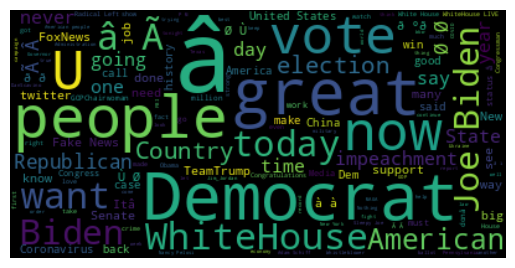




Musk's the most used words


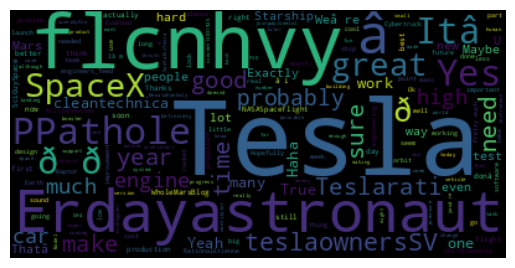




Biden's the most used words


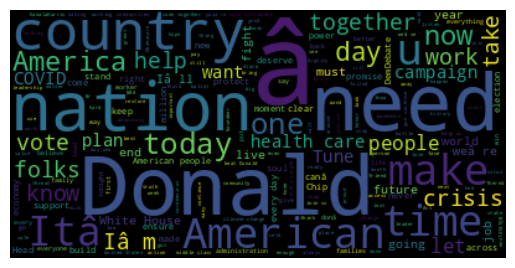

In [18]:
# Function to generate word cloud for a given DataFrame
def generate_word_cloud(df):
    # Extract the "tweet" column
    tweets = df['tweet'].astype(str)  # Convert to string type

    # Join all the tweets into a single string
    all_tweets = ' '.join(tweets)

    # Set the stopwords to ignore in the word cloud
    stopwords = set(STOPWORDS)
    stopwords.update(['the', 'a', 'in', 'with', 'to', 'an', 'at', 'on', 'off', 'with', 'without', 'by', 'RT',
                      'http', 'https', 'amp', 'will', 'am', 'are', 'realDonaldTrump', 'Thank', 'President', 't',
                      'co', 's', 'elonmusk', 'Trump'])

    # Generate the word cloud
    wordcloud = WordCloud(stopwords=stopwords).generate(all_tweets)

    # Display the word cloud
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Generate word cloud for the 'trump2019_2020' DataFrame
print("Trump's the most used words")
generate_word_cloud(trump2019_2020)
print('\n\n')

# Generate word cloud for the 'musk2019_2020' DataFrame
print("Musk's the most used words")
generate_word_cloud(musk2019_2020)
print('\n\n')

# Generate word cloud for the 'biden2019_2020' DataFrame
print("Biden's the most used words")
generate_word_cloud(biden2019_2020)


In [19]:
# Function to perform sentiment analysis using TextBlob
def perform_sentiment_analysis(df):
    analyzed_df = df.copy()
    analyzed_df['sentiment'] = ''
    analyzed_df['subjectivity'] = ''
    analyzed_df['polarity'] = ''

    for index, row in analyzed_df.iterrows():
        tweet = row['tweet']
        sentiment, subjectivity, polarity = get_sentiment_label(TextBlob(tweet).sentiment)
        analyzed_df.at[index, 'sentiment'] = sentiment
        analyzed_df.at[index, 'subjectivity'] = subjectivity
        analyzed_df.at[index, 'polarity'] = polarity

    return analyzed_df

# Function to get sentiment label, subjectivity, and polarity based on sentiment score
def get_sentiment_label(sentiment):
    polarity = sentiment.polarity
    subjectivity = sentiment.subjectivity
    
    if polarity > 0:
        sentiment_label = 'positive'
    elif polarity < 0:
        sentiment_label = 'negative'
    else:
        sentiment_label = 'neutral'
    
    return sentiment_label, subjectivity, polarity

# Perform sentiment analysis on Musk's tweets
analyzed_musk2019_2020 = perform_sentiment_analysis(musk2019_2020)

# Perform sentiment analysis on Biden's tweets
analyzed_biden2019_2020 = perform_sentiment_analysis(biden2019_2020)

# Perform sentiment analysis on Trump's tweets
analyzed_trump2019_2020 = perform_sentiment_analysis(trump2019_2020)


In [20]:
analyzed_musk2019_2020

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,cashtags,link,retweet,quote_url,video,thumbnail,reply_to,sentiment,subjectivity,polarity
761,1344520570235457536,1344518758707113986,2020-12-31 07:47:38 EET,2020-12-31,07:47:38,300,44196397,elonmusk,Elon Musk,Ignore the heading,...,[],https://twitter.com/elonmusk/status/1344520570...,False,NaN,0,NaN,[],neutral,0.0,0.0
762,1344518758707113986,1344518758707113986,2020-12-31 07:40:26 EET,2020-12-31,07:40:26,300,44196397,elonmusk,Elon Musk,Great interview with Mathias DÃ¶pfner https:/...,...,[],https://twitter.com/elonmusk/status/1344518758...,False,NaN,0,NaN,[],positive,0.75,0.8
763,1344513508323565569,1344444478334136321,2020-12-31 07:19:34 EET,2020-12-31,07:19:34,300,44196397,elonmusk,Elon Musk,@jack ð:copyright: The Greatest Gatsby ð:c...,...,[],https://twitter.com/elonmusk/status/1344513508...,False,NaN,0,NaN,"[{'screen_name': 'jack', 'name': 'jack', 'id':...",positive,1.0,1.0
764,1344469598893035521,1344395644488871936,2020-12-31 04:25:06 EET,2020-12-31,04:25:06,300,44196397,elonmusk,Elon Musk,@flcnhvy Inspired by the ballet,...,[],https://twitter.com/elonmusk/status/1344469598...,False,NaN,0,NaN,"[{'screen_name': 'flcnhvy', 'name': 'Viv', 'id...",neutral,0.0,0.0
765,1344462159560904706,1344444938591866889,2020-12-31 03:55:32 EET,2020-12-31,03:55:32,300,44196397,elonmusk,Elon Musk,@smvllstvrs @ErcXspace Rocket motion is primar...,...,[],https://twitter.com/elonmusk/status/1344462159...,False,NaN,0,NaN,"[{'screen_name': 'smvllstvrs', 'name': 'smalls...",positive,0.5,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4782,1178932062733996032,1178931253229187072,2019-10-01 10:18:01 EEST,2019-10-01,10:18:01,300,44196397,elonmusk,Elon Musk,@HarryStoltz1 In solving for a good Mars clima...,...,[],https://twitter.com/elonmusk/status/1178932062...,False,NaN,0,NaN,"[{'screen_name': 'HarryStoltz1', 'name': 'Harr...",positive,0.675,0.75
4783,1178931253229187072,1178931253229187072,2019-10-01 10:14:48 EEST,2019-10-01,10:14:48,300,44196397,elonmusk,Elon Musk,Inside Starship cargo bay. Header tanks mounte...,...,[],https://twitter.com/elonmusk/status/1178931253...,False,NaN,1,https://pbs.twimg.com/ext_tw_video_thumb/11789...,[],neutral,0.0,0.0
4784,1178905464202883072,1177680697991008256,2019-10-01 08:32:20 EEST,2019-10-01,08:32:20,300,44196397,elonmusk,Elon Musk,@EvaFoxU @DisruptResearch @Tesla @karpathy Coo...,...,[],https://twitter.com/elonmusk/status/1178905464...,False,NaN,0,NaN,"[{'screen_name': 'EvaFoxU', 'name': 'Eva Cyber...",positive,0.65,0.4375
4785,1178818555061493761,1177680697991008256,2019-10-01 02:46:59 EEST,2019-10-01,02:46:59,300,44196397,elonmusk,Elon Musk,@DisruptResearch @Tesla @karpathy Probably our...,...,[],https://twitter.com/elonmusk/status/1178818555...,False,NaN,0,NaN,"[{'screen_name': 'DisruptResearch', 'name': 'D...",positive,0.5,0.5


In [21]:
analyzed_trump2019_2020

,id,time,url,tweet,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,sentiment,subjectivity,polarity
10693,@realDonaldTrump,2019-10-01 00:49:00,https://twitter.com/realDonaldTrump/status/11...,"""It was my Great Honor to attend this morning...","General Mark Milley! https://t.co/CXoDPnimgz""",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,positive,0.55,0.533333
10694,@realDonaldTrump,2019-10-01 02:55:00,https://twitter.com/realDonaldTrump/status/11...,"""Navistar will be building a new 250 MILLION ...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,positive,0.636364,0.435606
10695,@realDonaldTrump,2019-10-01 03:04:00,https://twitter.com/realDonaldTrump/status/11...,"""Great news! @Apple announced that it is buil...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,positive,0.401515,0.378788
10696,@realDonaldTrump,2019-10-01 03:08:00,https://twitter.com/realDonaldTrump/status/11...,"""BIG NEWS by @Hyundai",@Kia,and @Aptiv on a 4 BILLION DOLLAR joint ventur...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral,0.1,0.0
10697,@realDonaldTrump,2019-10-01 03:45:00,https://twitter.com/realDonaldTrump/status/11...,"""My great friend",@RepMarkMeadows,has been an EXCELLENT Chairman of the House @...,which has been a tremendous success. I am loo...,"@RepAndyBiggsAZ!""",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,positive,0.75,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22921,@realDonaldTrump,2020-12-30 20:43:00,https://twitter.com/realDonaldTrump/status/13...,"""The Federal Government has distributed the v...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral,0.0,0.0
22922,@realDonaldTrump,2020-12-30 21:20:00,https://twitter.com/realDonaldTrump/status/13...,"""$2000 ASAP!""",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral,0.0,0.0
22923,@realDonaldTrump,2020-12-30 22:26:00,https://twitter.com/realDonaldTrump/status/13...,"""Hearings from Atlanta on the Georgia Electio...","BIG! Also won the other Swing States.""",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,positive,0.5,0.5
22924,@realDonaldTrump,2020-12-30 23:37:00,https://twitter.com/realDonaldTrump/status/13...,"""RT @TeamTrump: Time for state legislators to...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative,0.873016,-0.481151


In [22]:
analyzed_biden2019_2020

,id,time,url,tweet,replies,retweets,quotes,likes,sentiment,subjectivity,polarity
1290,1.083930e+18,2019-12-01 03:17:00,https://twitter.com/JoeBiden/status/1083925881...,White supremacists and their shameful ideology...,1060,7923,253,43003,neutral,0.0,0.0
1319,1.105270e+18,2019-12-03 00:51:00,https://twitter.com/JoeBiden/status/1105270121...,Joe Boardman led @Amtrak through difficult tim...,153,231,15,2683,negative,0.46,-0.26
1332,1.116810e+18,2019-12-04 21:13:00,https://twitter.com/JoeBiden/status/1116811587...,"In the last 5 years, @StopandShop's parent com...",376,1554,89,7159,negative,0.322222,-0.166667
1400,1.126920e+18,2019-10-05 18:21:00,https://twitter.com/JoeBiden/status/1126915076...,Iâm proud to have been one of the first to i...,808,1815,156,12963,positive,0.708333,0.4875
1401,1.126920e+18,2019-10-05 18:21:00,https://twitter.com/JoeBiden/status/1126915077...,We need policies that reflect this urgency. I'...,319,382,47,4165,positive,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...
6050,1.322870e+18,2020-01-11 11:40:00,https://twitter.com/JoeBiden/status/1322865972...,"As president, Iâll build an economy that rew...",3085,3654,480,36995,neutral,0.0,0.0
6051,1.322870e+18,2020-01-11 12:01:00,https://twitter.com/JoeBiden/status/1322871257...,Letâs put dogs back in the White House. http...,2211,4211,1246,34240,neutral,0.0,0.0
6052,1.322880e+18,2020-01-11 12:20:00,https://twitter.com/JoeBiden/status/1322876039...,We have in our hands the ultimate power: the p...,918,1143,122,6954,negative,0.5,-0.1
6053,1.322880e+18,2020-01-11 12:40:00,https://twitter.com/JoeBiden/status/1322881072...,"We need to:\n\nBuild bridges, not walls.\nOpen...",1281,2255,344,16696,positive,0.391667,0.291667


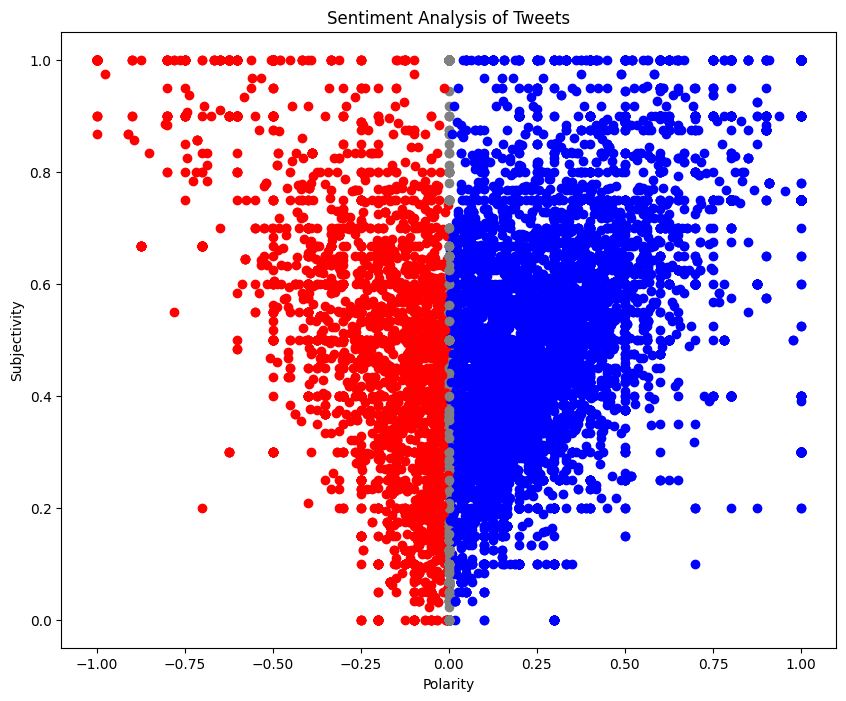

In [23]:
# Function to set color based on sentiment
def get_color(sentiment):
    if sentiment == 'negative':
        return 'red'
    elif sentiment == 'neutral':
        return 'gray'
    elif sentiment == 'positive':
        return 'blue'

# Plotting
plt.figure(figsize=(10, 8))

# Plot for Musk's, Trump's, and Biden's tweets
for df in [analyzed_musk2019_2020, analyzed_trump2019_2020, analyzed_biden2019_2020]:
    for i, row in df.iterrows():
        polarity = row['polarity']
        subjectivity = row['subjectivity']
        sentiment = row['sentiment']
        color = get_color(sentiment)
        plt.scatter(polarity, subjectivity, color=color)

# Set labels and title
plt.title('Sentiment Analysis of Tweets')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

# Show the plot
plt.show()

In [23]:
# Convert the "time" column to datetime
analyzed_musk2019_2020['date'] = pd.to_datetime(analyzed_musk2019_2020['date'])
analyzed_trump2019_2020['time'] = pd.to_datetime(analyzed_trump2019_2020['time'])
analyzed_biden2019_2020['time'] = pd.to_datetime(analyzed_biden2019_2020['time'])

# Group by the date and calculate the average sentiment for each day
day_grouped_musk2019_2020 = analyzed_musk2019_2020.groupby(analyzed_musk2019_2020['date'].dt.date)['polarity'].mean()
day_grouped_trump2019_2020 = analyzed_trump2019_2020.groupby(analyzed_trump2019_2020['time'].dt.date)['polarity'].mean()
day_grouped_biden2019_2020 = analyzed_biden2019_2020.groupby(analyzed_biden2019_2020['time'].dt.date)['polarity'].mean()

In [24]:
day_grouped_musk2019_2020

date
2019-10-01    0.245647
2019-10-02    0.181746
2019-10-03    0.129600
2019-10-04    0.237037
2019-10-05    0.191667
                ...   
2020-12-27    0.329296
2020-12-28    0.142857
2020-12-29    0.085897
2020-12-30    0.117493
2020-12-31    0.350000
Name: polarity, Length: 419, dtype: float64

In [25]:
day_grouped_trump2019_2020

time
2019-10-01    0.152220
2019-10-02    0.186851
2019-10-03    0.110608
2019-10-04    0.072120
2019-10-05    0.060885
                ...   
2020-12-26    0.103351
2020-12-27    0.029167
2020-12-28    0.558333
2020-12-29    0.073854
2020-12-30    0.098135
Name: polarity, Length: 456, dtype: float64

In [26]:
day_grouped_biden2019_2020

time
2019-10-05    0.266572
2019-10-06    0.133333
2019-10-07    0.164773
2019-10-08    0.149784
2019-10-09    0.029497
                ...   
2020-12-06    0.035764
2020-12-07   -0.006463
2020-12-08    0.147128
2020-12-09    0.085417
2020-12-10    0.245843
Name: polarity, Length: 389, dtype: float64

In [27]:
for company in company_data_2019_2020:
    company_data_2019_2020[company]['biden'] = day_grouped_biden2019_2020
    company_data_2019_2020[company]['biden'].fillna(0, inplace=True)
    company_data_2019_2020[company]['musk'] = day_grouped_musk2019_2020
    company_data_2019_2020[company]['musk'].fillna(0, inplace=True)
    company_data_2019_2020[company]['trump'] = day_grouped_trump2019_2020
    company_data_2019_2020[company]['trump'].fillna(0, inplace=True)

In [28]:
company_data_2019_2020

{'MMM':                   Open        High         Low       Close   Adj Close  \
 Date                                                                     
 2019-10-01  165.000000  165.210007  158.169998  158.380005  136.838776   
 2019-10-02  157.059998  157.220001  154.630005  155.649994  134.480072   
 2019-10-03  155.139999  155.460007  150.809998  155.229996  134.117203   
 2019-10-04  155.229996  156.050003  154.399994  155.820007  134.626984   
 2019-10-07  155.000000  155.350006  153.520004  153.520004  132.639816   
 ...                ...         ...         ...         ...         ...   
 2020-12-23  175.300003  175.809998  173.960007  173.990005  157.272995   
 2020-12-24  174.419998  174.789993  173.419998  174.520004  157.752075   
 2020-12-28  175.309998  176.399994  174.389999  174.710007  157.923843   
 2020-12-29  175.550003  175.639999  173.149994  173.850006  157.146439   
 2020-12-30  173.880005  174.919998  173.380005  174.110001  157.381454   
 
              Vo

In [29]:
cols = [
    'Open',
    'High', 'Low',
    'Close',
    'Adj Close',
    # 'biden'
    'musk'
    # 'trump'
        ]
#Date and volume columns are not used in training.
print(cols)

# #New dataframe with only training data - 5 columns
full_df_for_training = {}

for company in company_data_2019_2020:
    df = company_data_2019_2020[company]
    df_selected = df[cols].astype(float)
    full_df_for_training[company] = df_selected

['Open', 'High', 'Low', 'Close', 'Adj Close', 'musk']


In [30]:
full_df_for_training

{'MMM':                   Open        High         Low       Close   Adj Close  \
 Date                                                                     
 2019-10-01  165.000000  165.210007  158.169998  158.380005  136.838776   
 2019-10-02  157.059998  157.220001  154.630005  155.649994  134.480072   
 2019-10-03  155.139999  155.460007  150.809998  155.229996  134.117203   
 2019-10-04  155.229996  156.050003  154.399994  155.820007  134.626984   
 2019-10-07  155.000000  155.350006  153.520004  153.520004  132.639816   
 ...                ...         ...         ...         ...         ...   
 2020-12-23  175.300003  175.809998  173.960007  173.990005  157.272995   
 2020-12-24  174.419998  174.789993  173.419998  174.520004  157.752075   
 2020-12-28  175.309998  176.399994  174.389999  174.710007  157.923843   
 2020-12-29  175.550003  175.639999  173.149994  173.850006  157.146439   
 2020-12-30  173.880005  174.919998  173.380005  174.110001  157.381454   
 
                

In [31]:
df_for_training = full_df_for_training['ZION']

# Data scaling for LSTM because it uses sigmoid and tanh that are sensitive to magnitude
scaler = MinMaxScaler()
df_for_training_scaled = scaler.fit_transform(df_for_training)

# Separate scaler for inference on Open and Adj Close columns
scaler_for_inference = MinMaxScaler()
scaler_for_inference.fit(df_for_training[['Open', 'Adj Close']])

df_for_training_scaled


array([[0.72258772, 0.72080841, 0.68344559, 0.66607906, 0.65374655,
        0.52821049],
       [0.64400579, 0.64034428, 0.64976956, 0.6410437 , 0.62872163,
        0.47382641],
       [0.629386  , 0.63360774, 0.63913506, 0.65620591, 0.64387767,
        0.42944644],
       ...,
       [0.68201752, 0.68787424, 0.69762487, 0.6798308 , 0.73595781,
        0.44072948],
       [0.67214909, 0.65980537, 0.67493791, 0.65902685, 0.71423106,
        0.39225314],
       [0.64948831, 0.66279946, 0.68025522, 0.67489429, 0.73080241,
        0.4191426 ]])

In [32]:
# As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features.
# Empty lists to be populated using formatted training data
trainX = []  # List to store input sequences
trainY = []  # List to store output values

n_future = 1  # Number of days we want to look into the future based on the past days.
n_past = 5  # Number of past days we want to use to predict the future.

# Reformat input data into a shape: (n_samples x timesteps x n_features)
for i in range(n_past, len(df_for_training_scaled) - n_future + 1):
    # Extract the input sequence of past days
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    # Extract the output value (Open and Adj Close) for the future day
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, [0, -2]])

# Convert the lists to numpy arrays
trainX, trainY = np.array(trainX), np.array(trainY)

# Print the shapes of trainX and trainY arrays
print('TrainX shape = {}.'.format(trainX.shape))
print('TrainY shape = {}.'.format(trainY.shape))


TrainX shape = (311, 5, 6).
TrainY shape = (311, 1, 2).


In [35]:
# Train-test split for LSTM without Twitter data
X_train_lstm_without_twitter, X_test_lstm_without_twitter, y_train_lstm_without_twitter, y_test_lstm_without_twitter = train_test_split(trainX[:,:,:-1], trainY, test_size=0.2, shuffle=False)

# Train-test split for LSTM with Twitter data
X_train_lstm_twitter, X_test_lstm_twitter, y_train_lstm_twitter, y_test_lstm_twitter = train_test_split(trainX, trainY, test_size=0.2, shuffle=False)

# Print the shapes of the training data for LSTM without Twitter data and LSTM with Twitter data
print('X_train_lstm_without_twitter shape:', X_train_lstm_without_twitter.shape)
print('X_train_lstm_twitter shape:', X_train_lstm_twitter.shape)

X_train_lstm_without_twitter shape: (248, 5, 5)
X_train_lstm_twitter shape: (248, 5, 6)


In [36]:
# Train-validation split for LSTM without Twitter data
X_train_lstm_without_twitter, X_val_lstm_without_twitter, y_train_lstm_without_twitter, y_val_lstm_without_twitter = train_test_split(X_train_lstm_without_twitter, y_train_lstm_without_twitter, test_size=0.1, shuffle=False)

# Train-validation split for LSTM with Twitter data
X_train_lstm_twitter, X_val_lstm_twitter, y_train_lstm_twitter, y_val_lstm_twitter = train_test_split(X_train_lstm_twitter, y_train_lstm_twitter, test_size=0.1, shuffle=False)

# Print the shapes of the training data for LSTM without Twitter data and LSTM with Twitter data
print('X_train_lstm_without_twitter shape:', X_train_lstm_without_twitter.shape)
print('X_train_lstm_twitter shape:', X_train_lstm_twitter.shape)


X_train_lstm_without_twitter shape: (223, 5, 5)
X_train_lstm_twitter shape: (223, 5, 6)


In [37]:
def build_model(input_shape):
    tf.random.set_seed(seed)
    cnn_lstm_model = Sequential()

    # Convolutional layers
    cnn_lstm_model.add(Conv1D(filters=128, kernel_size=2, strides=1, padding='valid', input_shape=input_shape))
    cnn_lstm_model.add(MaxPooling1D(pool_size=2, strides=2))

    cnn_lstm_model.add(Conv1D(filters=64, kernel_size=2, strides=1, padding='valid'))
    cnn_lstm_model.add(MaxPooling1D(pool_size=1, strides=2))

    # Bidirectional LSTM layers
    cnn_lstm_model.add(Bidirectional(LSTM(256, return_sequences=True)))
    cnn_lstm_model.add(Dropout(0.2))
    cnn_lstm_model.add(Bidirectional(LSTM(256, return_sequences=True)))
    cnn_lstm_model.add(Dropout(0.2))

    # Fully connected layers
    cnn_lstm_model.add(Dense(32, activation='relu'))
    cnn_lstm_model.add(Dense(trainY.shape[2], activation='relu'))

    # Compile the model
    cnn_lstm_model.compile(optimizer='adam', loss='mse')

    # Print the model summary
    cnn_lstm_model.summary()

    return cnn_lstm_model

In [38]:
seed = 42

# Build the model without Twitter data
cnn_lstm_model_without_twitter = build_model((X_train_lstm_without_twitter.shape[1], X_train_lstm_without_twitter.shape[2]))

# Build the model with Twitter data
cnn_lstm_model_twitter = build_model((X_train_lstm_twitter.shape[1], X_train_lstm_twitter.shape[2]))

# Fit the model without Twitter data
history_without_twitter = cnn_lstm_model_without_twitter.fit(
    X_train_lstm_without_twitter, y_train_lstm_without_twitter,
    epochs=50, batch_size=64,
    validation_data=(X_val_lstm_without_twitter, y_val_lstm_without_twitter),
    verbose=1
)

# Fit the model with Twitter data
history_twitter = cnn_lstm_model_twitter.fit(
    X_train_lstm_twitter, y_train_lstm_twitter,
    epochs=50, batch_size=64,
    validation_data=(X_val_lstm_twitter, y_val_lstm_twitter),
    verbose=1
)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 128)            1408      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2, 128)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 64)             16448     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 bidirectional (Bidirectiona  (None, 1, 512)           657408    
 l)                                                              
                                                        

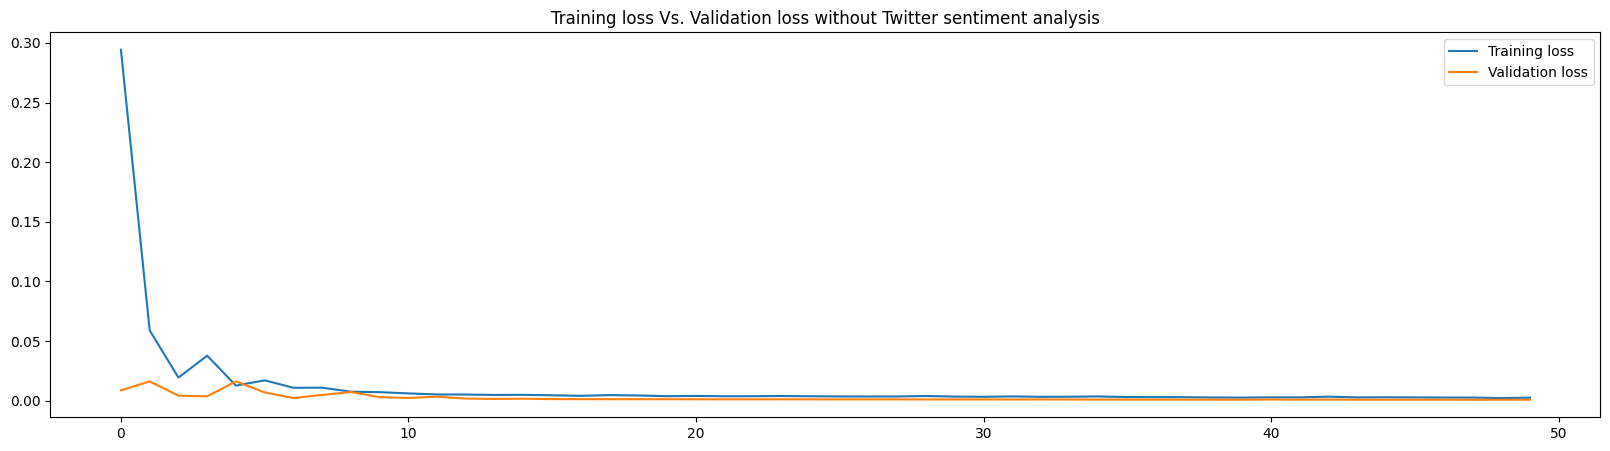

In [39]:
plt.figure(figsize=(20, 5))
plt.plot(history_without_twitter.history['loss'], label='Training loss')
plt.plot(history_without_twitter.history['val_loss'], label='Validation loss')
plt.title('Training loss Vs. Validation loss without Twitter sentiment analysis')
plt.legend()

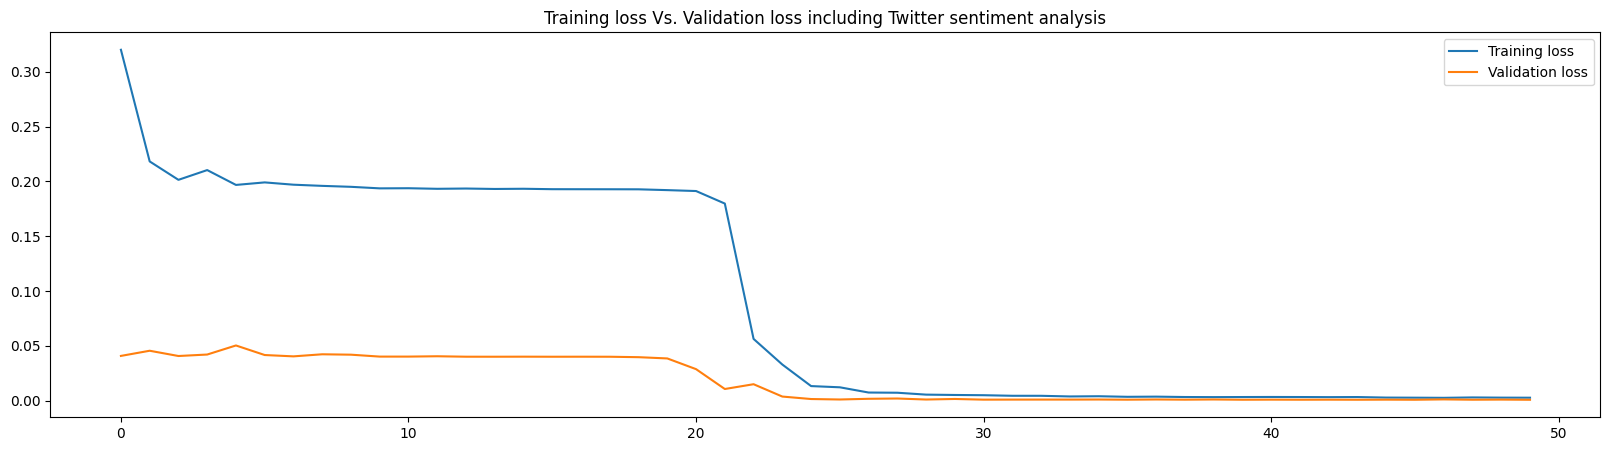

In [40]:
plt.figure(figsize=(20, 5))
plt.plot(history_twitter.history['loss'], label='Training loss')
plt.plot(history_twitter.history['val_loss'], label='Validation loss')
plt.title('Training loss Vs. Validation loss including Twitter sentiment analysis')
plt.legend()

In [41]:
def plot_predictions_with_dates(type, twitter, dates, y_actual_lstm, y_pred_lstm):
    predicted_features = ['Open', 'Adj Close']
    
    for i, predicted_feature in enumerate(predicted_features):
        plt.figure(figsize=(15, 6))
        
        if twitter:
            plt.title(f'LSTM {type} prediction of {predicted_feature} feature after adding Twitter sentiment analysis')
        else:
            plt.title(f'LSTM {type} prediction of {predicted_feature} feature without Twitter sentiment analysis')
        
        # Plot actual values
        sns.lineplot(x=dates, y=y_actual_lstm[:, i], label='Actual')
        
        # Plot predicted values
        sns.lineplot(x=dates, y=y_pred_lstm[:, i], label='Predicted')
        
        plt.show()
        
        # Calculate and print mean squared error
        error = mean_squared_error(y_actual_lstm[:, i], y_pred_lstm[:, i])
        print(f'Mean squared error for {predicted_feature}: {error}')
    
    # Calculate and print total mean squared error
    total_error = mean_squared_error(y_actual_lstm, y_pred_lstm)
    print('Total mean squared error:', total_error)

In [42]:
training_dates = df_for_training.index[:X_train_lstm_without_twitter.shape[0]]

# Make predictions using the LSTM model without Twitter sentiment analysis
training_prediction_without_twitter = cnn_lstm_model_without_twitter.predict(X_train_lstm_without_twitter)
training_prediction_without_twitter = training_prediction_without_twitter.reshape(training_prediction_without_twitter.shape[0], training_prediction_without_twitter.shape[2])

# Make predictions using the LSTM model with Twitter sentiment analysis
training_prediction_twitter = cnn_lstm_model_twitter.predict(X_train_lstm_twitter)
training_prediction_twitter = training_prediction_twitter.reshape(training_prediction_twitter.shape[0], training_prediction_twitter.shape[2])

# Perform inverse scaling to obtain the actual predicted values
y_train_pred_lstm_without_twitter = scaler_for_inference.inverse_transform(training_prediction_without_twitter)
y_train_pred_lstm_twitter = scaler_for_inference.inverse_transform(training_prediction_twitter)

# Reshape the actual training data for inverse scaling
y_train_lstm_reshaped_without_twitter = y_train_lstm_without_twitter.reshape(y_train_lstm_without_twitter.shape[0], y_train_lstm_without_twitter.shape[2])

# Perform inverse scaling to obtain the actual training values
y_train_actual_lstm = scaler_for_inference.inverse_transform(y_train_lstm_reshaped_without_twitter)


7/7 [==============================] - 1s 5ms/step


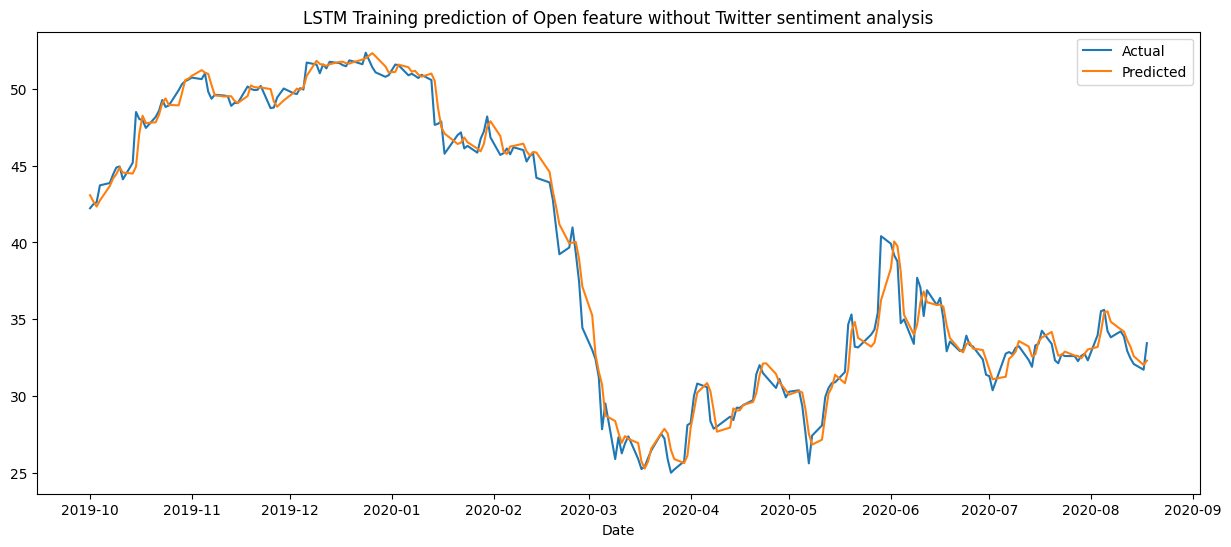

Mean squared error for Open: 0.9258219995327257


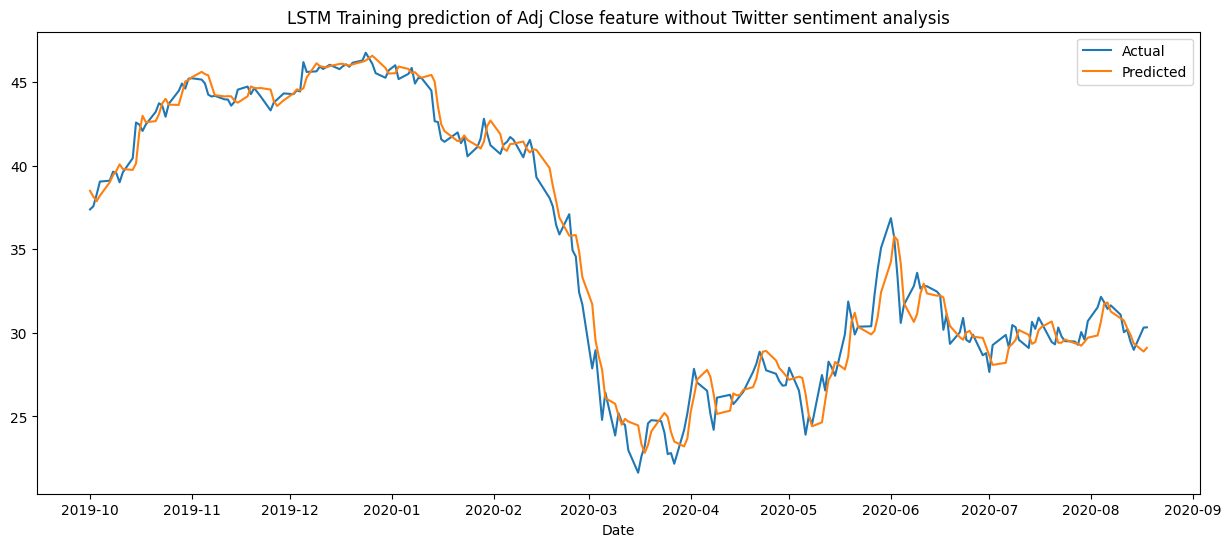

Mean squared error for Adj Close: 1.240866519096669
Total mean squared error: 1.0833442593146974


In [43]:
plot_predictions_with_dates('Training',False,training_dates,y_train_actual_lstm,y_train_pred_lstm_without_twitter)

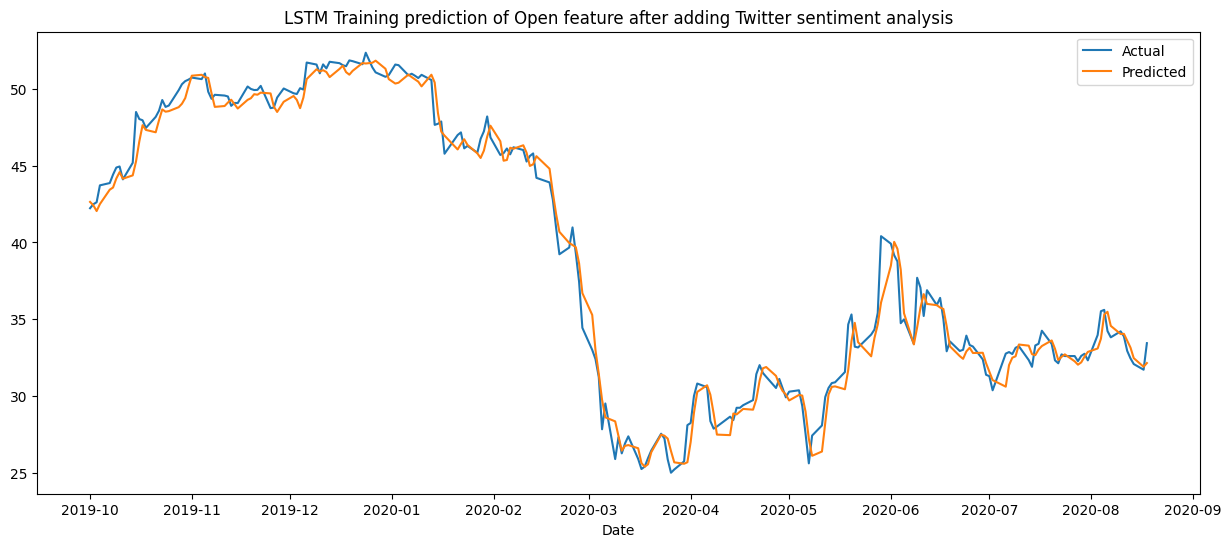

Mean squared error for Open: 1.0070010596610115


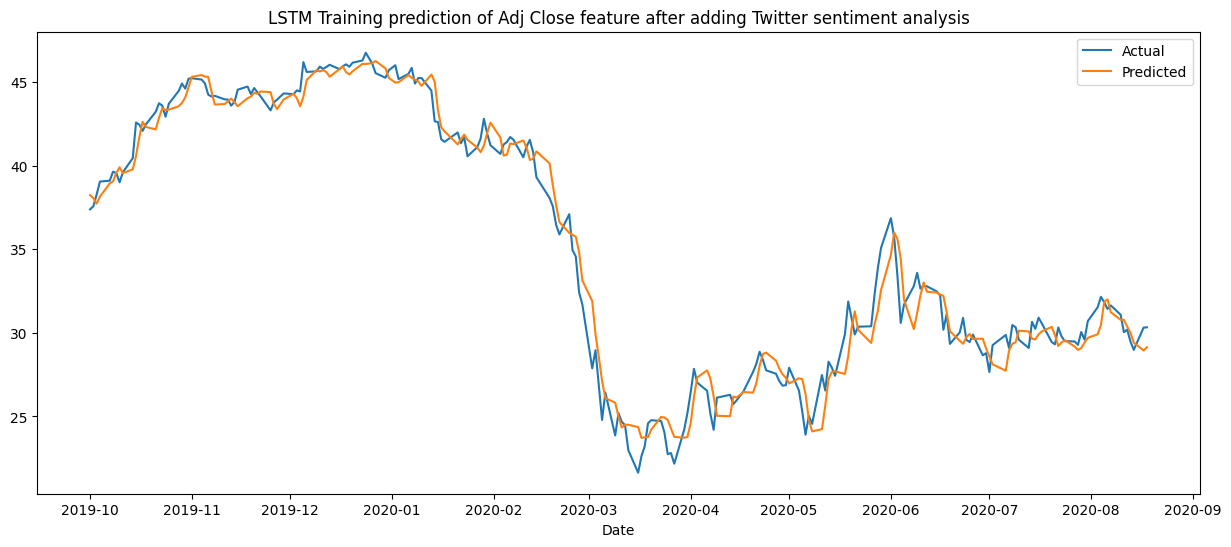

Mean squared error for Adj Close: 1.2704864363012482
Total mean squared error: 1.1387437479811298


In [44]:
plot_predictions_with_dates('Training',1,training_dates,y_train_actual_lstm,y_train_pred_lstm_twitter)